## Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [ ]:
!gdown 1sLitvGwCk9zGDTTzW5Osmj40vwpmR1PV

Downloading...
From: https://drive.google.com/uc?id=1sLitvGwCk9zGDTTzW5Osmj40vwpmR1PV
To: /content/Jamboree_Admission.csv
100% 16.2k/16.2k [00:00<00:00, 31.0MB/s]


In [ ]:
df = pd.read_csv('/content/Jamboree_Admission.csv')

In [ ]:
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(500, 9)

There are 500 rows and 9 columns in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Here the serial number is not of much importance. So, we can drop them. But before that we will create a backup data.

In [ ]:
backup = df.copy()

In [ ]:
df.drop(['Serial No.'], axis = 1, inplace = True) #we are dropping a column here so axis = 1 and do it inplace.

In [ ]:
df.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


There are no missing values in the dataset.

In [ ]:
df.duplicated().sum()

0

Here we also note that we need to rename the 'Chance of Admit ' it should be 'Chance of Admit'.

In [ ]:
df.rename(columns = {'Chance of Admit ' : 'Chance of Admit'}, inplace = True)

There are no duplicate rows in the dataset.

## Univariate Analysis

In [ ]:
#checking unique number of values in the contineous variables
columns = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']

col_unique_count = []
for col in columns:
    col_unique_count.append(df[col].nunique())

col_uni_df = pd.DataFrame({'Columns': columns, 'Number of Unique Values': col_unique_count})
col_uni_df

,Columns,Number of Unique Values
0,GRE Score,49
1,TOEFL Score,29
2,CGPA,184
3,Chance of Admit,61


In [ ]:
df['GRE Score'].value_counts(bins = 5, normalize = True)

,proportion
"(310.0, 320.0]",0.308
"(320.0, 330.0]",0.282
"(300.0, 310.0]",0.192
"(330.0, 340.0]",0.112
"(289.949, 300.0]",0.106


In [ ]:
df['TOEFL Score'].value_counts(bins = 5, normalize = True)

,proportion
"(108.8, 114.4]",0.296
"(103.2, 108.8]",0.282
"(97.6, 103.2]",0.252
"(114.4, 120.0]",0.128
"(91.97099999999999, 97.6]",0.042


In [ ]:
df['Chance of Admit'].value_counts(bins = 5, normalize = True)

,proportion
"(0.718, 0.844]",0.310
"(0.592, 0.718]",0.282
"(0.844, 0.97]",0.218
"(0.466, 0.592]",0.142
"(0.338, 0.466]",0.048


In [ ]:
df['CGPA'].value_counts(bins = 5, normalize = True)

,proportion
"(8.048, 8.672]",0.350
"(8.672, 9.296]",0.312
"(7.424, 8.048]",0.192
"(9.296, 9.92]",0.122
"(6.795999999999999, 7.424]",0.024


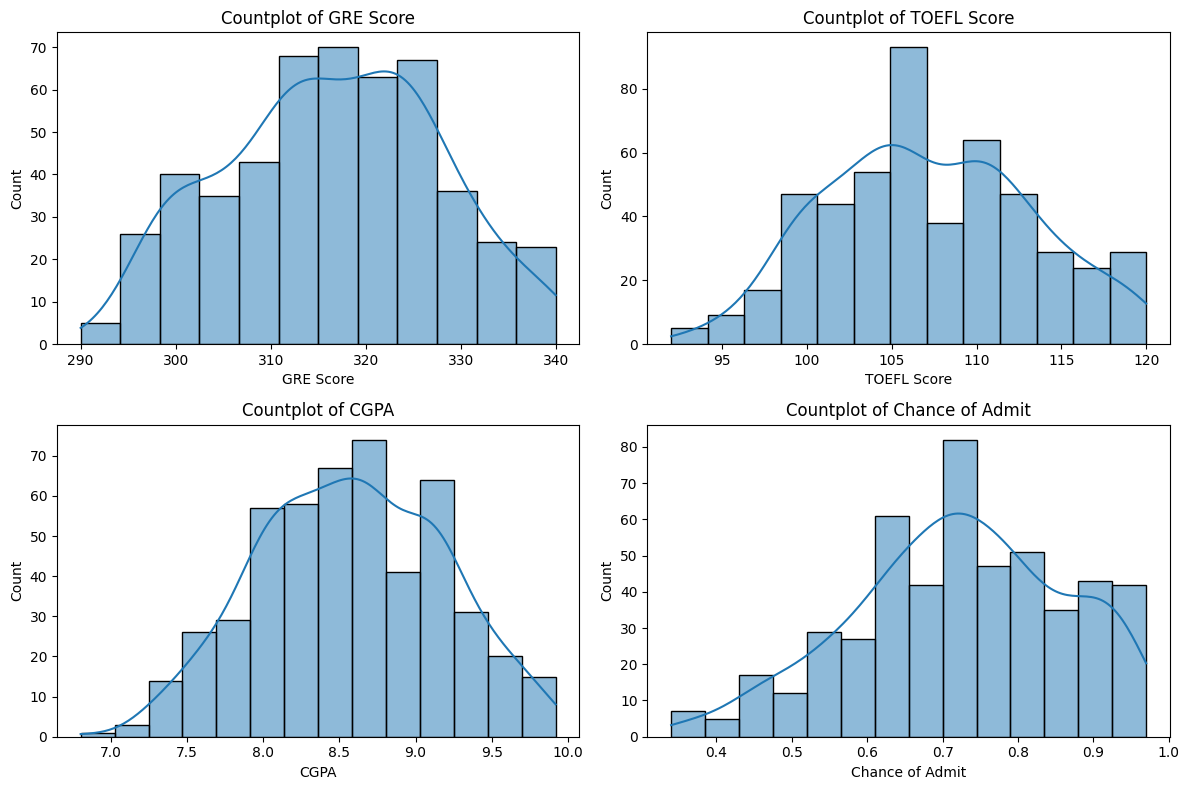

In [ ]:
#Plotting the countplot of each contineous column
columns = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']
fig, axes = plt.subplots(2,2, figsize = (12,8))
axes = axes.flatten()
for i, col in enumerate(columns):
  sns.histplot(data = df, x = col, kde = True, ax = axes[i])
  axes[i].set_title(f'Countplot of {col}')

plt.tight_layout()
plt.show()

1. About 58% of students have GRE score between 310-300.
2. About 57% of students have TOEFL score between 103-105.
3. Almost 65% of students have CGPA score between 8.05 - 9.30.
4. Almost 60% of students have Chance of Admit between 60 - 85%.

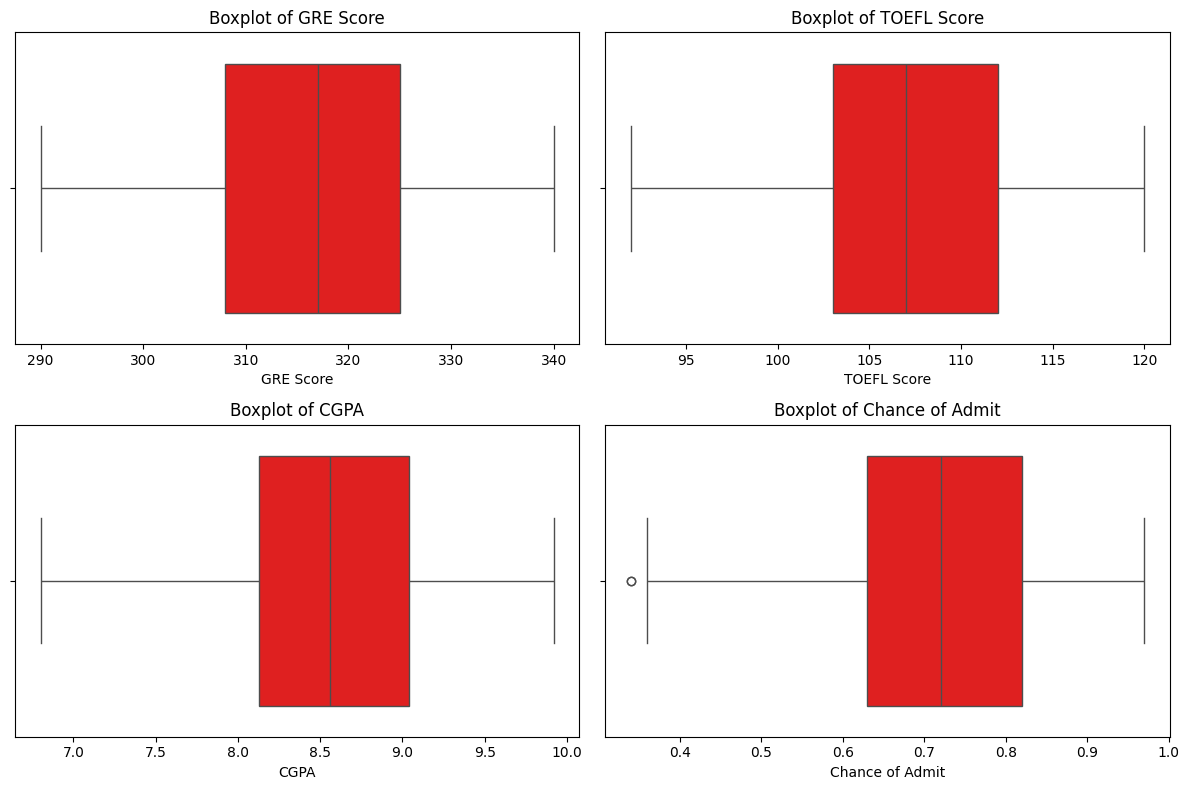

In [ ]:
#Plotting boxplots of all the contineous columns
columns = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8))
axes = axes.flatten()
for i, col in enumerate(columns):
  sns.boxplot(data = df, x = col, ax = axes[i], color = 'red')
  axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

- No outliers for `GRE Score`, `TOEFL Score` and `CGPA`.
- One outlier for `Chance of Admit`.

In [ ]:
# Value counts of LOR
df.rename(columns = {'LOR ' : 'LOR'}, inplace = True)
df['LOR'].value_counts(bins=5, normalize=True)

,proportion
"(3.4, 4.2]",0.360
"(4.2, 5.0]",0.226
"(2.6, 3.4]",0.198
"(1.8, 2.6]",0.192
"(0.995, 1.8]",0.024


In [ ]:
#Value counts of SOP
df['SOP'].value_counts(bins=5, normalize = True)

,proportion
"(3.4, 4.2]",0.354
"(1.8, 2.6]",0.214
"(4.2, 5.0]",0.210
"(2.6, 3.4]",0.160
"(0.995, 1.8]",0.062


In [ ]:
#Value counts of University Rating
df['University Rating'].value_counts(bins=5, normalize = True)

,proportion
"(2.6, 3.4]",0.324
"(1.8, 2.6]",0.252
"(3.4, 4.2]",0.210
"(4.2, 5.0]",0.146
"(0.995, 1.8]",0.068


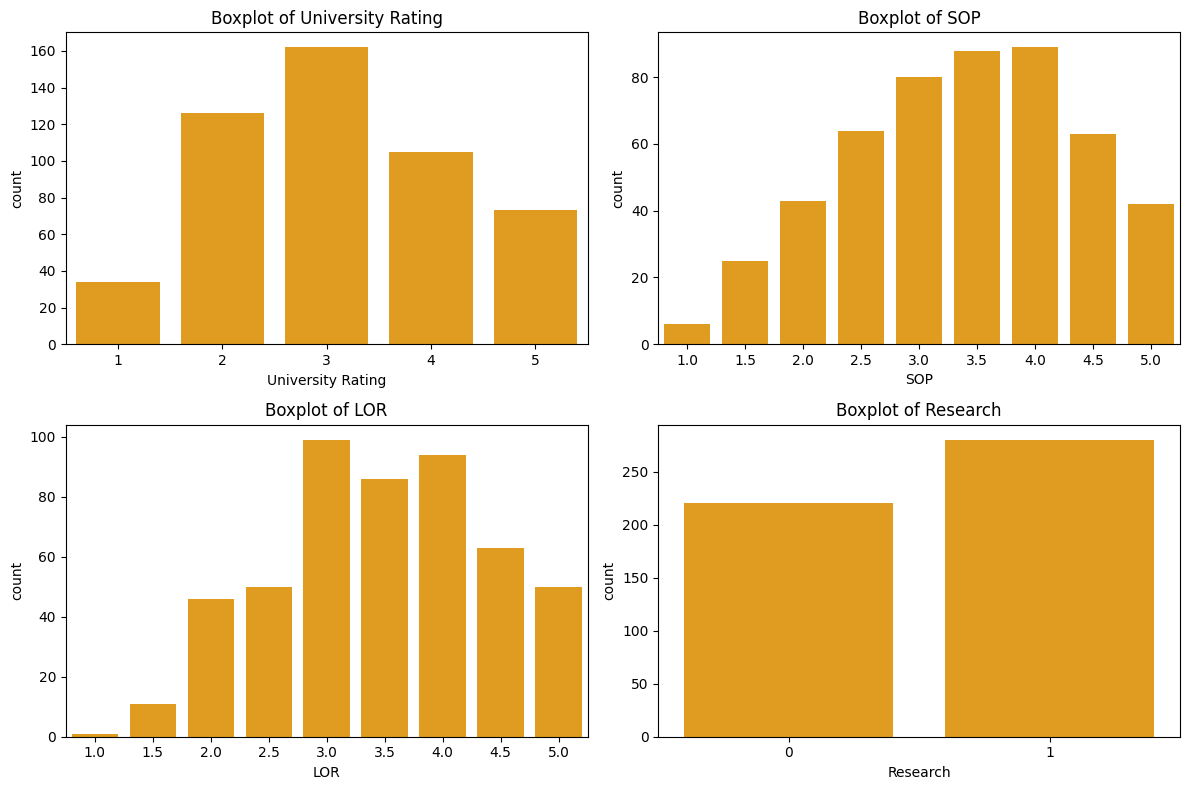

In [ ]:
col_name_c = ['University Rating', 'SOP', 'LOR', 'Research']
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8))
axes = axes.flatten()

for i, col in enumerate(col_name_c):
  sns.countplot(data = df, x = col, ax = axes[i], color = 'orange')
  axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

- Almost 65% of students have LOR between 2 - 4.
- Almost 63% of students have SOP between 2 - 4.
- Almost 65% of students have University Rating between 1 - 3.

## Bivariate Analysis

[]

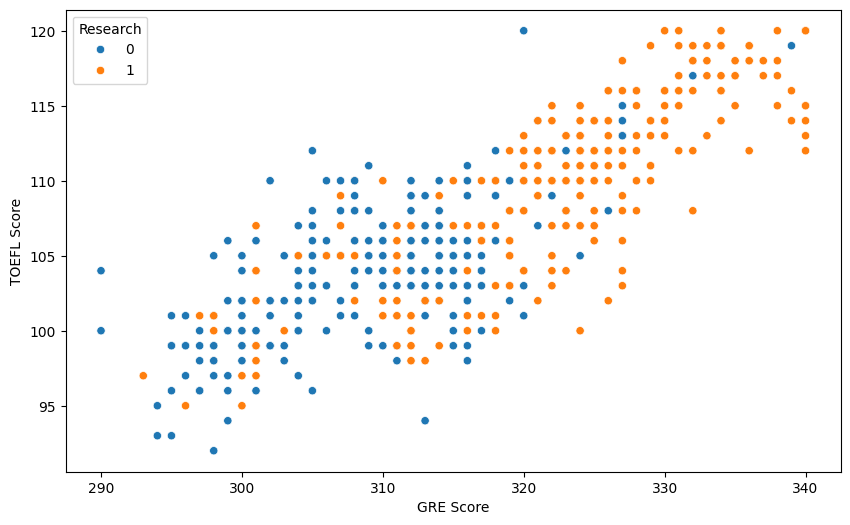

In [ ]:
#relationship between GRE and TOEFL score
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = 'GRE Score', y = 'TOEFL Score', color = 'purple', hue = 'Research')
plt.plot()

GRE score and TOEFL Score bear no relationship at all.

[]

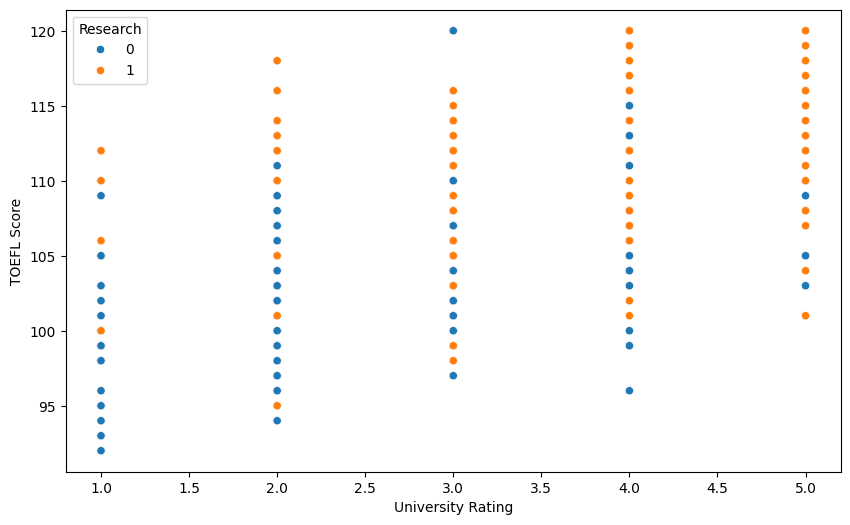

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = 'University Rating', y = 'TOEFL Score', color = 'CGPA', hue = 'Research')
plt.plot()

Usually high university ratings have very high toefl score admits.

[]

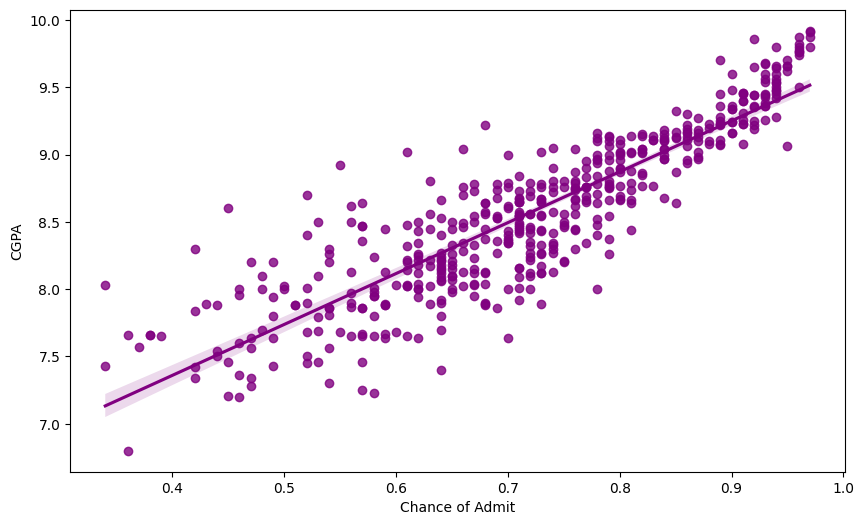

In [ ]:
plt.figure(figsize = (10,6))
sns.regplot(data = df, x = 'Chance of Admit', y = 'CGPA', color = 'purple')
plt.plot()

From this we can see that there is a linear relationship between Chance of Admit and CGPA.

## Multivariate Analysis

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


<Figure size 1800x1200 with 0 Axes>

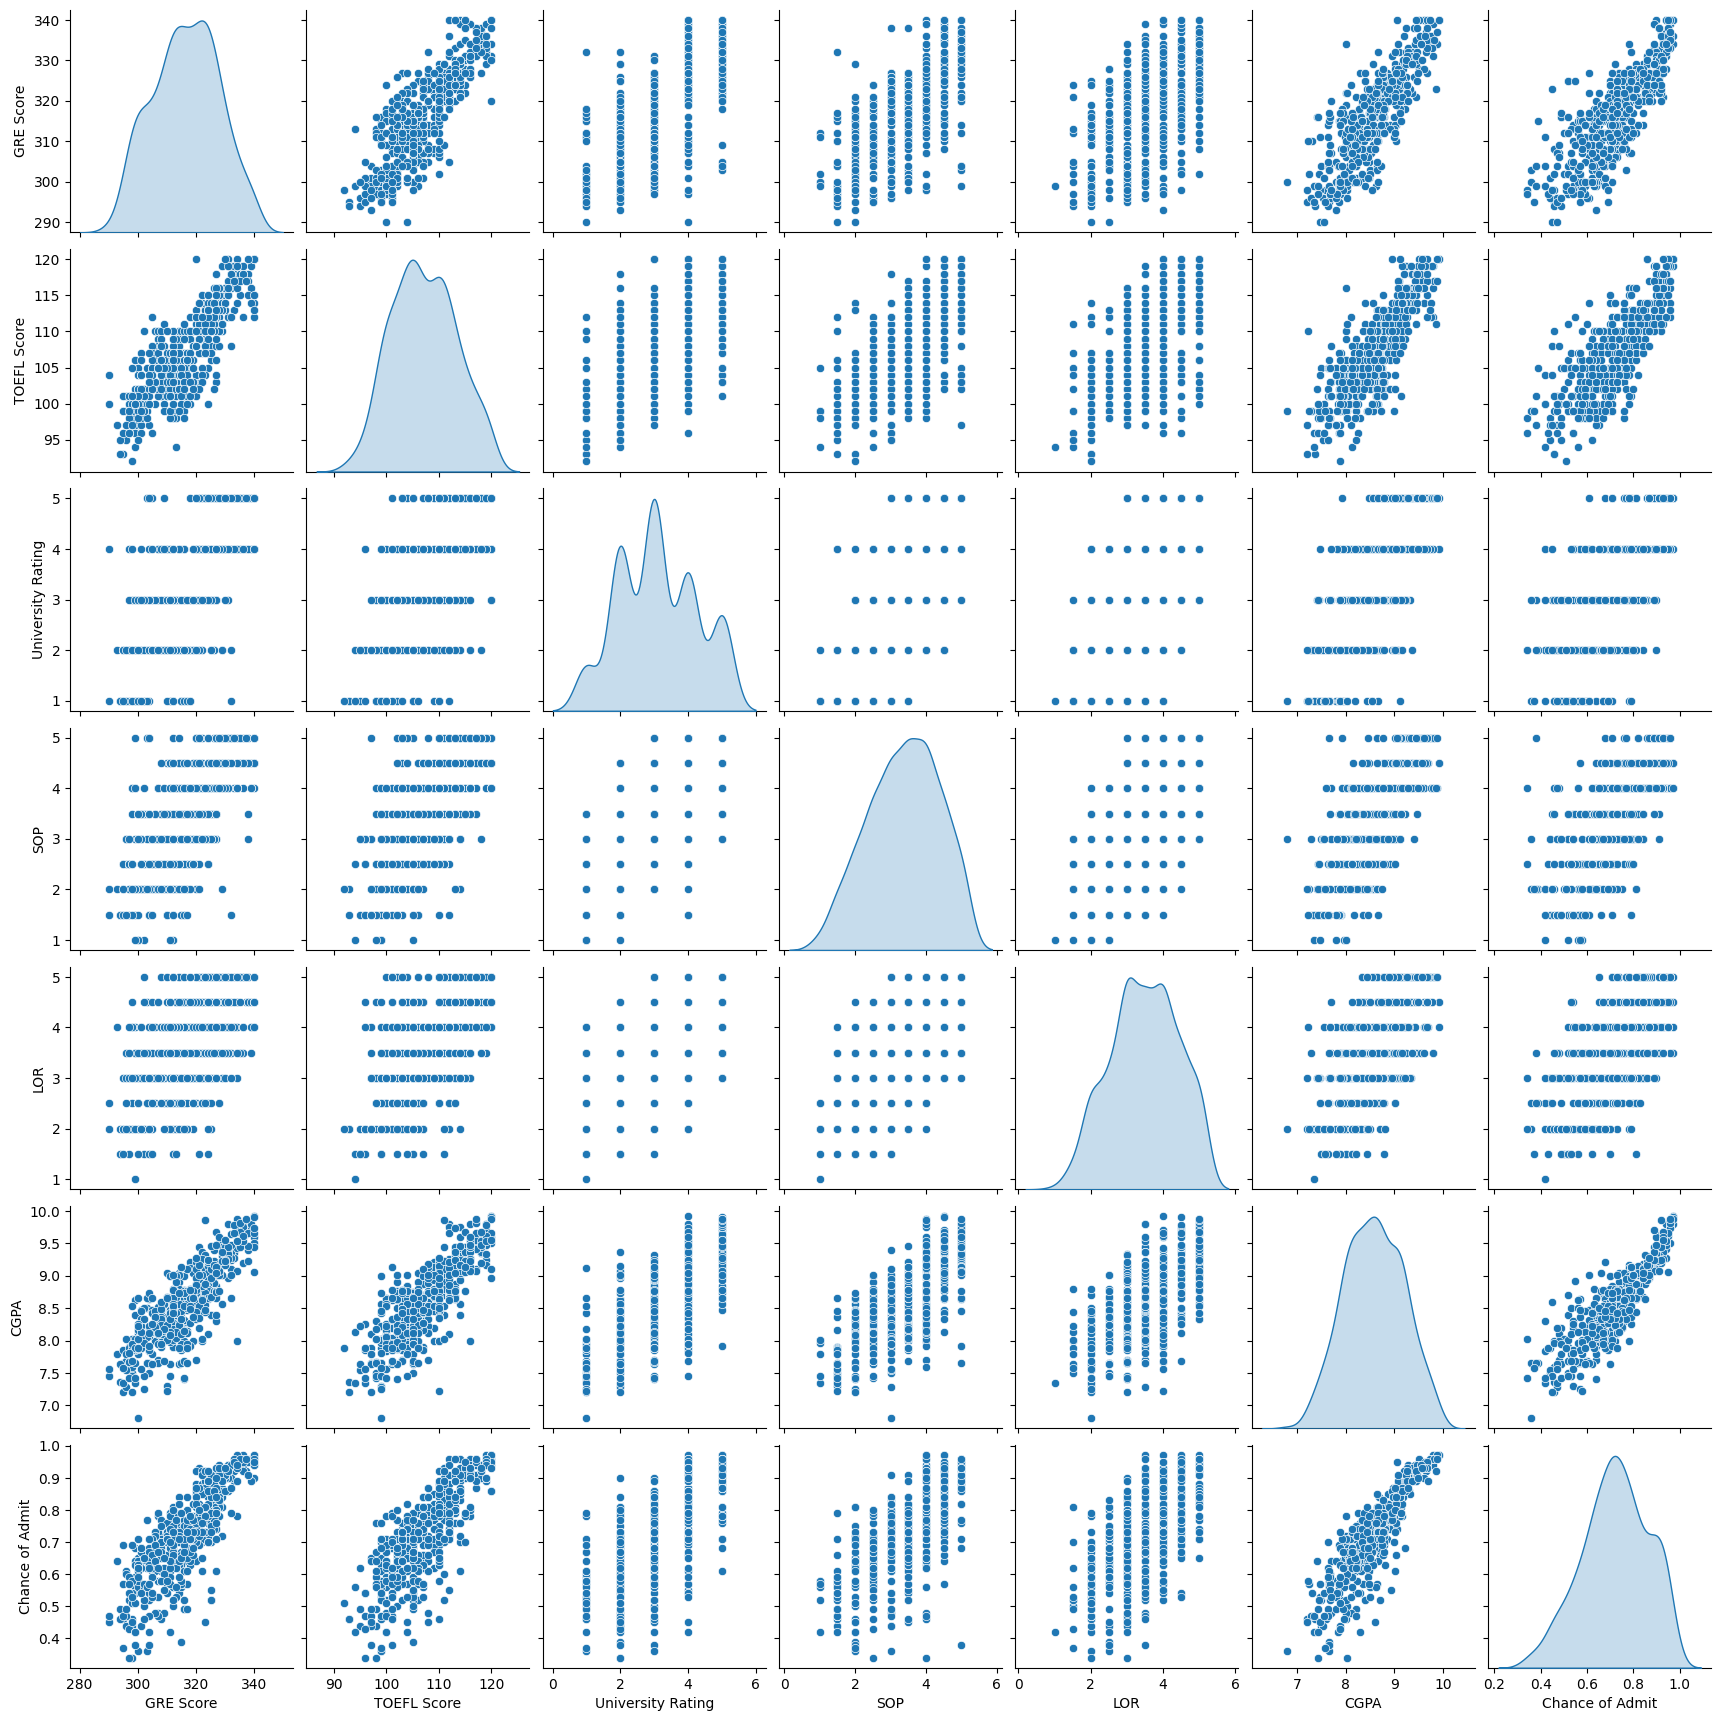

In [ ]:
continuous_columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Chance of Admit']
plt.figure(figsize = (18, 12))
sns.pairplot(df[continuous_columns], diag_kind='kde')
plt.show()

The above graph shows relationships between various features with respect to each other and also the label relationship with feature.

<Axes: >

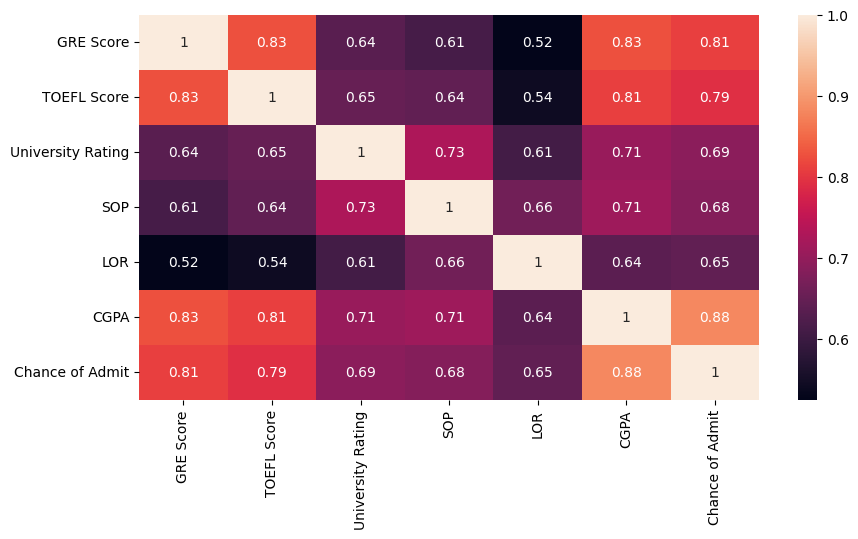

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(df[continuous_columns].corr(), annot = True)

1. **GRE Score** and **Chance of Admit** have **0.81** correlation.
2. **TOEFL Score** and **Chance of Admit** have **0.79** correlation.
3. **University Rating** and **Chance of Admit** have **0.69** correlation.
4. **SOP** and **Chance of Admit** have **0.68** correlation.
5. **LOR** and **Chance of Admit** have **0.65** correlation.
6. **CGPA** and **Chance of Admit** have **0.88** correlation.

## Data Preprocessing

In [ ]:
#Check for duplicate records and treat them accordingly if found
df.duplicated().sum()

0

There are no duplicate values in dataset.

In [ ]:
#Check for missing values and treat them accordingly if found.
df.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


There are no null values in the dataset.

In [ ]:
#Check for outlier values and treat them accordingly if found.
'''For this we will use the Interqurtile Range Method'''
columns = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']

for col in columns:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  if not outliers.empty:
    print(f'\nOutliers detected in {col}:')
    print(outliers[[col]])
  else:
    print(f'\nno outliers detected in {col}.')


no outliers detected in GRE Score.

no outliers detected in TOEFL Score.

no outliers detected in CGPA.

Outliers detected in Chance of Admit:
     Chance of Admit
92              0.34
376             0.34


The output shows that there are two outliers detected in the "Chance of Admit" column at rows 92 and 376, with both values being 0.34. Given the fact that the dataset is small and `Chance of Admit` is the output we will not drop these two rows

## Correlation among independent variables and how they interact with each other.

In [ ]:
independent_features = df.columns.drop('Chance of Admit')
correlation_matrix = df[independent_features].corr()
correlation_matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000


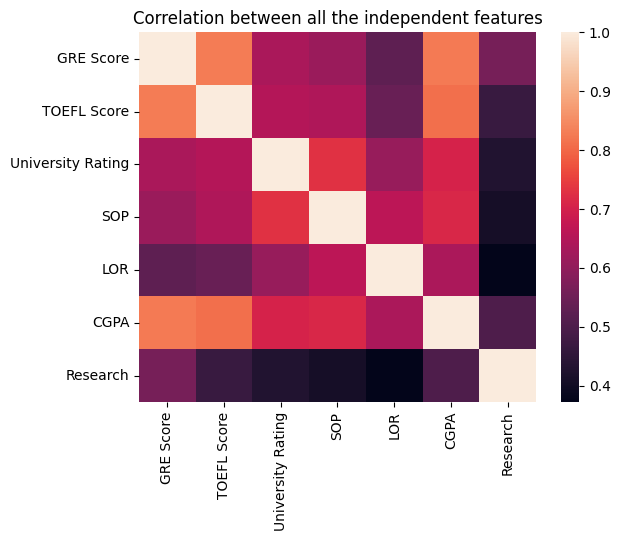

In [ ]:
sns.heatmap(correlation_matrix)
plt.title('Correlation between all the independent features')
plt.show()

Here, since there is not feature that has >= 0.90 correlation with other feature so we will not drop any feature.

## Preparing the data for modeling.

### Let's check if we can encode any categorical feature.

In [ ]:
unique_values_per_column = df.nunique()
print(unique_values_per_column)

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64


In [ ]:
df['University Rating'].unique()

array([4, 3, 2, 5, 1])

Since the University ratings are **ordinal** in nature so we don't need to encode them.

In [ ]:
df['Research'].unique()

array([1, 0])

No encoding needed here as well.

### Performing the train-test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Splitting the data into features(X) and label(y)
X = df.drop(columns = ['Chance of Admit'])
y = df['Chance of Admit']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 1)

In [ ]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (400, 7)
Shape of X_test:  (100, 7)
Shape of y_train:  (400,)
Shape of y_test:  (100,)


In [ ]:
# n: number of data points
# f: number of features

n = X.shape[0]
d = X.shape[1]

print('Number of samples:', n)
print('Number of features:', d)

Number of samples: 500
Number of features: 7


### Perform data standardization

In [ ]:
#scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Here we standardize the data for our model. Without standardization, features with larger ranges (e.g., TOEFL scores vs. CGPA in the dataset) can disproportionately influence the model's coefficients, making it harder to identify the true relationships between features and the target variable.

## Model Building and Evaluating Model's Performance

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
y_predict = lr.predict(X_test_scaled)

In [ ]:
import math
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2score = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
rmse = math.sqrt(mse)

In [ ]:
print('R2 score: ', r2score)
print('Mean Squared Error: ', mse)
print('Mean Absolute Error: ', mae)
print('Root Mean Squared Error: ', rmse)

R2 score:  0.8208741703103731
Mean Squared Error:  0.003459098897136384
Mean Absolute Error:  0.040200193804157944
Root Mean Squared Error:  0.0588141045765077


In [ ]:
n = X_train_scaled.shape[0]
k = X_train_scaled.shape[1]

adj_r2 = 1 - ((1 - r2score)/(n-k-1))*(n-1)
print('Adjusted R2 Score: ', adj_r2)

Adjusted R2 Score:  0.8176754947802012


In [ ]:
#Let's get the coefficients of each feature.
coeff = lr.coef_
intercept = lr.intercept_

print(f'Coefficients {coeff}')
print(f'Intercept {intercept}')

Coefficients [0.02091007 0.01965792 0.00701103 0.00304937 0.01352815 0.07069295
 0.00988992]
Intercept 0.7209250000000001


[]

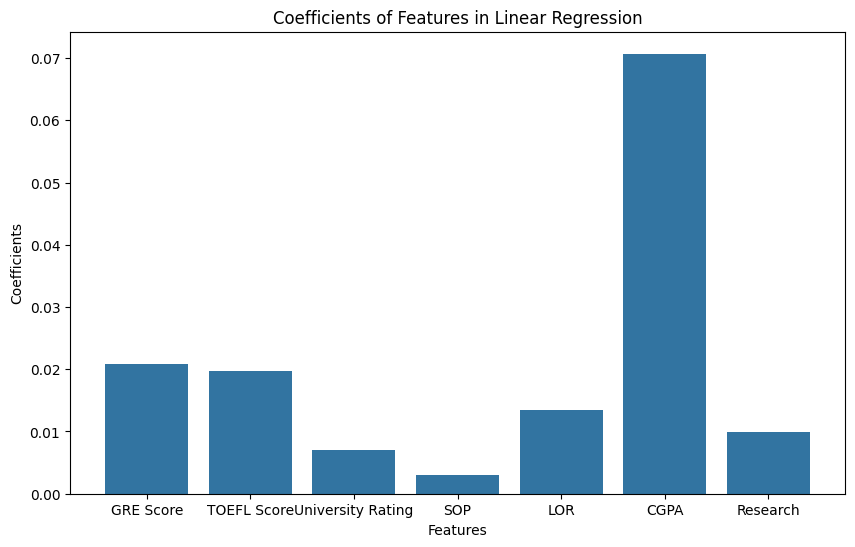

In [ ]:
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
plt.figure(figsize = (10,6))
sns.barplot(x = features, y = coeff)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Coefficients of Features in Linear Regression')
plt.plot()

From this we deduce that **CGPA** is the most important feature in the dataset followed by **GRE Score** and **TOEFL Score**.

### Implementing Lasso Regularization

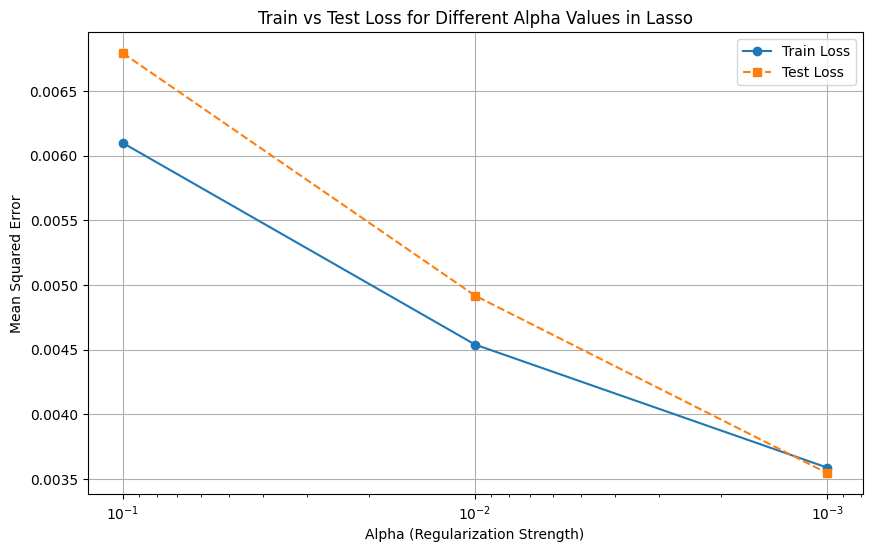

In [ ]:
from sklearn.linear_model import Lasso, LassoCV
lasso_cv = LassoCV(alphas=[0.1, 0.01, 0.001], cv=5)
lasso_cv.fit(X_train, y_train)

best_alpha = lasso_cv.alpha_

train_losses = []
test_losses = []

for alpha in lasso_cv.alphas_:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)

    y_train_pred = lasso.predict(X_train)
    train_loss = mean_squared_error(y_train, y_train_pred)

    y_test_pred = lasso.predict(X_test)
    test_loss = mean_squared_error(y_test, y_test_pred)

    train_losses.append(train_loss)
    test_losses.append(test_loss)

plt.figure(figsize=(10, 6))
plt.plot(lasso_cv.alphas_, train_losses, label='Train Loss', marker='o', linestyle='-')
plt.plot(lasso_cv.alphas_, test_losses, label='Test Loss', marker='s', linestyle='--')

plt.xscale('log')
plt.gca().invert_xaxis()

plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('Train vs Test Loss for Different Alpha Values in Lasso')
plt.legend()
plt.grid(True)
plt.show()

Best alpha is `0.001`.

In [ ]:
coefficients = lasso.coef_
feature_names = X_train.columns
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

GRE Score: 0.0022197634329400775
TOEFL Score: 0.0034685489363155625
University Rating: 0.006264706449695994
SOP: 0.0031911661518047025
LOR: 0.014179521828772537
CGPA: 0.10754923948234901
Research: 0.014474933939294853


[]

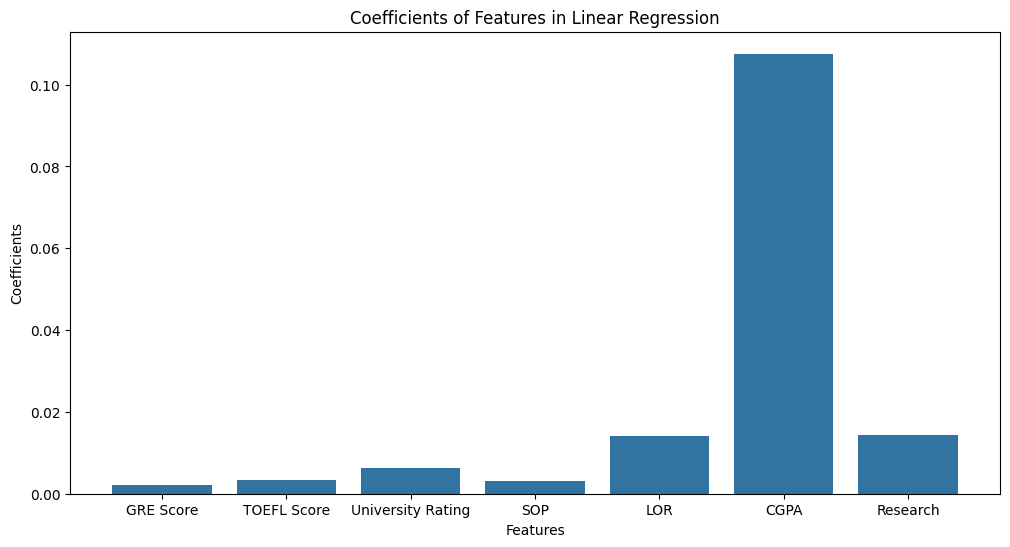

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = feature_names, y = coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Coefficients of Features in Linear Regression')
plt.plot()

### Ridge Regularization

In [ ]:
from sklearn.linear_model import RidgeCV, Ridge

alphas = [0.1, 1, 10, 100]
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)
best_alpha = ridge_cv.alpha_
print("Best alpha from cross-validation:", best_alpha)
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)
coefficients = ridge.coef_
feature_names = X_train.columns
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

Best alpha from cross-validation: 1.0
GRE Score: 0.0019147018277386651
TOEFL Score: 0.0032601310614962676
University Rating: 0.006315146642867626
SOP: 0.0033593437028638373
LOR: 0.014646918239483138
CGPA: 0.1131215195011562
Research: 0.019684592689635686


[]

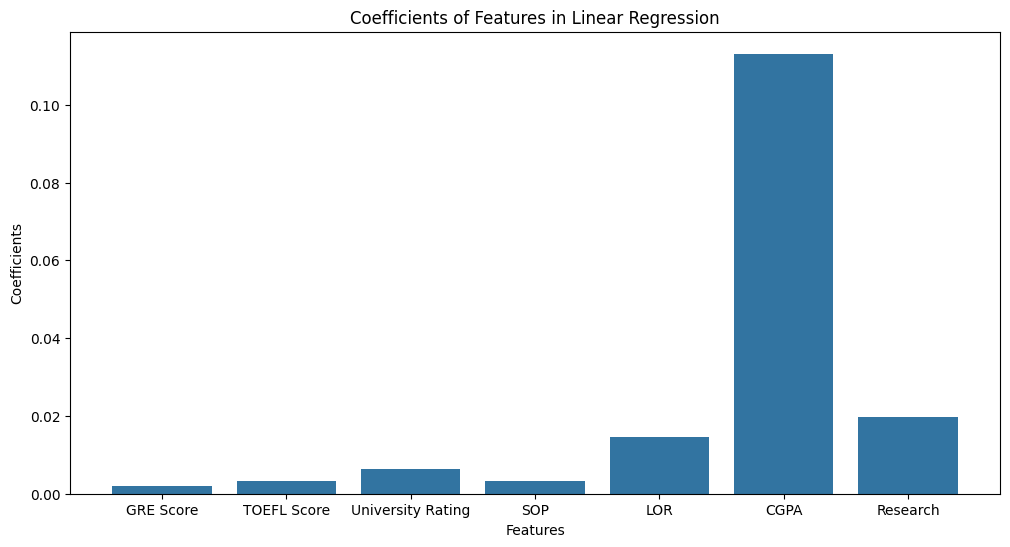

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = feature_names, y = coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Coefficients of Features in Linear Regression')
plt.plot()

## Test the assumptions of linear regression
Here we will be testing the assumptions of Linear Regression.

1. Assumption of linearity
2. No multicollinearity
3. Normality of residuals
4. No heteroskadasticity
5. No autocorrelation

### Assumption of linearity

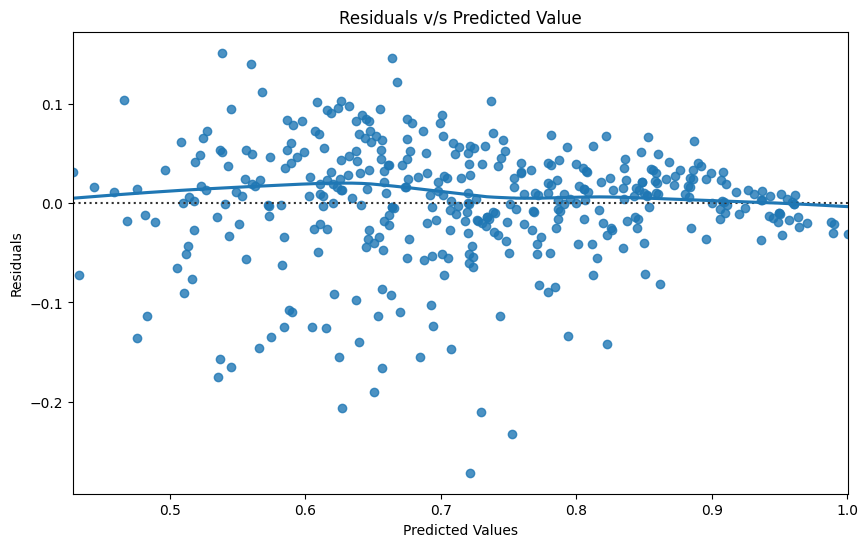

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
res = y_train - y_train_pred
plt.figure(figsize = (10,6))
sns.residplot(x=y_train_pred, y = res, lowess = True)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals v/s Predicted Value')
plt.show()

From the above plot, we can observe that there is no pattern and can be concluded that it shows linearity.

### No multicollinearity

For this we will use the Variance Inflation Factor.
Interpretation of multicollinearity:
- VIF < 5: Low multicollinearity
- 5 ≤ VIF < 10: Moderate multicollinearity
- VIF ≥ 10: High multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X = df[independent_features]
X_with_const = sm.add_constant(X)

vif = pd.DataFrame()
vif['Feature'] = X_with_const.columns
vif['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
print(vif)

             Feature          VIF
0              const  1511.495830
1          GRE Score     4.464249
2        TOEFL Score     3.904213
3  University Rating     2.621036
4                SOP     2.835210
5                LOR     2.033555
6               CGPA     4.777992
7           Research     1.494008


The constant term itself will always have a high VIF. This is not a concern as it's not a predictor variable.

### Mean of residuals should be close to zero.

The mean of residuals represents the average of residual values in a regression model.

The mean of residuals helps in understanding whether the regression model is biased or not. If the model is unbiased then mean would be close to zero. If it very far from zero, then we can say that the model would overestimate or underestimate the observed values.

Also from the distribution of the residuals we can conclude whether the model is biased or not.If it shows normal distribution then it is not biased otherwise it is.

In [ ]:
mean_residuals = np.mean(res)
print(f'Mean of Residuals: {mean_residuals}')

Mean of Residuals: -4.718447854656915e-17


As the mean is close to zero that means it is unbiased.

### Test for Homoscedasticity

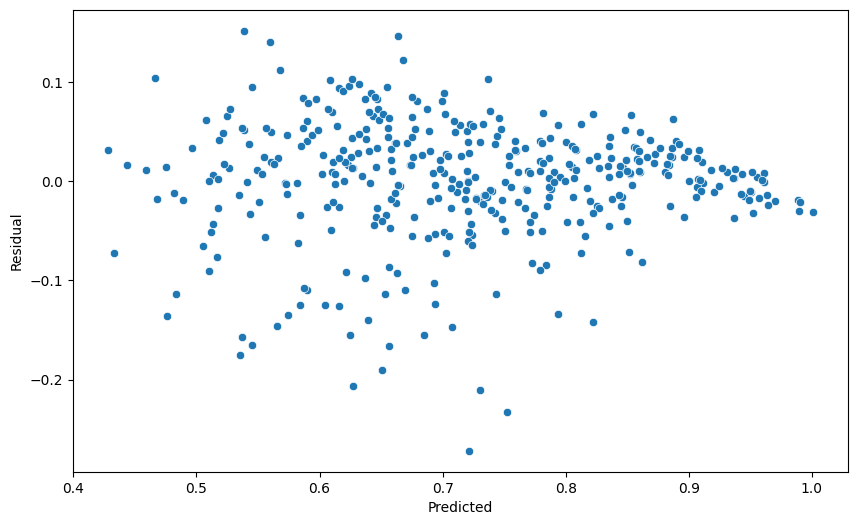

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_train_pred, y = res)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

Since the plot is not creating a cone type shape. Hence there is no homoskedasticity present in the data.

### Normality of residuals

<Axes: xlabel='Chance of Admit', ylabel='Count'>

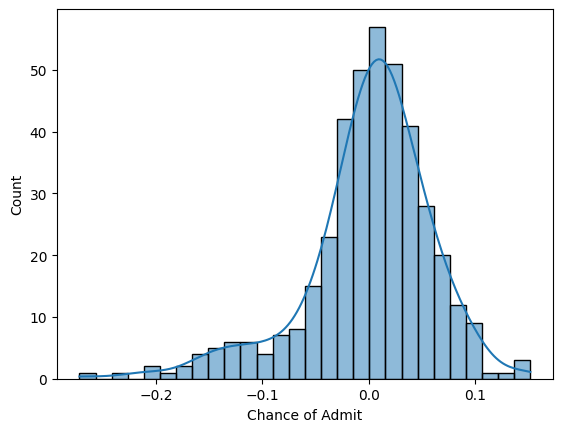

In [ ]:
sns.histplot(res, kde = True)

In [ ]:
from scipy.stats import shapiro

s_stat, p_val = shapiro(res)

if p_val < 0:
  print('The distribution is not normal')
else:
  print('Distribution of residuals is normal.')

Distribution of residuals is normal.


As the distribution of residual is normal and the shapirp statistic is also close to 1 that means normality of residual is there.

## Actionable Insights & Recommendations

**Insights**
- CGPA, GRE and TOEFL Scores are strongly related with chance of admit. These variables are also related to each other (collinear to each other), we deduce this from the heatmap.

- After removing GRE Score and TOEFL Score, accuracy of the model almost remained the same.

- By looking at model coefficients/weights, we can say that CGPA is the most significant feature while SOP/University Rating are the least significant.

- All Linear Regression, Lasso and Ridge Regression models have captured upto 82%(R2 score is about 82%).


**Recommendations**

CGPA, LORs, SOP and Research experience are enough for better prediction.

Awareness of CGPA and Research Capabilities : Seminars can be organised to increase the awareness regarding CGPA and Research Capabilities to enhance the chance of admission.

Education institutes can not just help student to improve their CGPA score but also assist them writing good LOR and SOP thus helping them admit to better university.

In [ ]:
!apt-get install pandoc
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!jupyter nbconvert --to pdf /content/Jamboree_Education_Linear_Regression.ipynb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc-data
Suggested packages:
  texlive-latex-recommended texlive-xetex texlive-luatex pandoc-citeproc texlive-latex-extra
  context wkhtmltopdf librsvg2-bin groff ghc nodejs php python ruby libjs-mathjax libjs-katex
  citation-style-language-styles
The following NEW packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc pandoc-data
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 20.6 MB of archives.
After this operation, 156 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [115 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm-extensions0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [25.1 kB]
